```pip install box2d-py``` after installing Visual C++ and rebooting.

In [1]:
from importlib import reload
import cartpole_lab.charts
reload(cartpole_lab.charts)

import numpy as np
import gym
import cartpole_lab.agent
import cartpole_lab.deeprico
import cartpole_lab.approximator
reload(cartpole_lab.agent)
reload(cartpole_lab.deeprico)
reload(cartpole_lab.approximator)
from cartpole_lab.deeprico import deep_rico

env = gym.make('LunarLander-v2')
observation = env.reset()

Using TensorFlow backend.


In [2]:
state = env.reset()
while True:
    action = env.action_space.sample()
    state, reward, done, _ = env.step(action)
    env.render()
    #print('reward=%f state=%s' % (reward, state))
    if done:
        break

In [5]:
env.close()

In [51]:
env.observation_space.shape[0]

8

In [52]:
env.action_space.n

4

Can I just re-use my existing agent without changes? I just looked through the code and it looks like it'll work without changes.

In [10]:
env.reset()

array([-3.9815903e-04,  1.4120896e+00, -4.0342692e-02,  5.1981959e-02,
        4.6813677e-04,  9.1382265e-03,  0.0000000e+00,  0.0000000e+00],
      dtype=float32)

In [11]:
env.render()

True

In [49]:
env.step(2)
env.render()

True

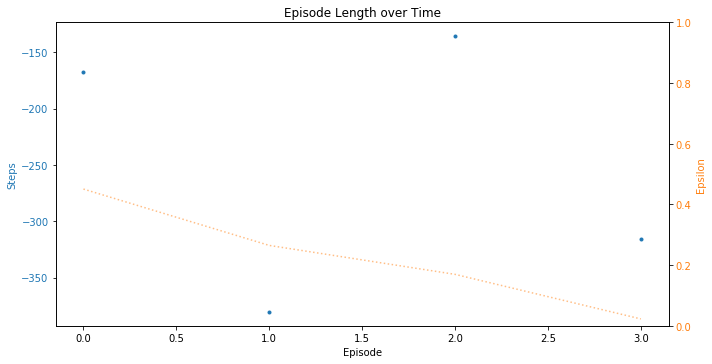

KeyboardInterrupt: 

In [3]:
agent = deep_rico(env)
agent.train(200)

In [75]:
def total_rewards(episode):
    return sum([reward for (state, action, reward, next_state, done) in episode])
        
def run_summary(agent, render=True):
    episode = agent.run_episode(render=render)
    return total_rewards(episode)

def run_episodes(agent, count=10, render=True):
    scores = []
    for _ in range(count):
        score = run_summary(agent, render=render)
        print('score=%f' % score)
        scores.append(score)
    print('Mean score=%f' % np.mean(scores))
        

In [80]:
run_episodes(agent, count=50)

score=-51.200880
score=-125.464478
score=-170.501011
score=-160.867104
score=-89.141042
score=-37.305674
score=-173.056069
score=-56.152626
score=-110.579257
score=1.083266
score=-81.956660
score=-92.974658
score=-93.504382
score=-112.623839
score=-105.537492
score=-44.003229
score=-274.851490
score=25.840209
score=-58.868252
score=-158.477480
score=-63.192177
score=-135.477708
score=-156.645456
score=-245.980976
score=-51.250780
score=-134.765406
score=-40.069092
score=-31.785831
score=-94.338191
score=-106.240501
score=-86.721231
score=-137.853934
score=-160.401204
score=-91.156154
score=-125.198360
score=-29.754442
score=-121.259174
score=-374.721615
score=-47.608622
score=-50.323715
score=-190.209312
score=-82.338111
score=-271.043354
score=-27.808871
score=-92.583098
score=-75.560896
score=-43.486363
score=-147.122497
score=-159.769894
score=-32.218932
Mean score=-107.540561


In [74]:
agent.policy.peek()

array([4.2793612, 4.8437734, 4.198536 , 4.87267  ], dtype=float32)

ValueError: operands could not be broadcast together with shapes (3,) (0,) 

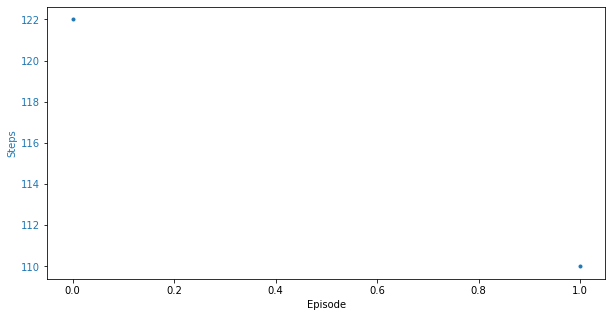

In [78]:
agent.train(200,render=True)

In [6]:
a = [1,2,3,4]
a[1:-2]

[2]